In [1]:
import utils
from dawid import otl_normalized
import minterpy as mp
import numpy as np
import matplotlib.pyplot as plt
import utilsLegandre

[[-0.20331342  0.04554769  0.97657373  0.54531757 -0.79499542 -0.94021048]
 [-0.8943777   0.77713307  0.21894151  0.26329781  0.84335827 -0.37520166]
 [ 0.54622032 -0.68659798  0.80626493 -0.33412497  0.08056643 -0.54498468]
 ...
 [-0.88489674 -0.37087965  0.35977053  0.83226013  0.87749037  0.71677146]
 [-0.58379727 -0.14656893  0.44342477  0.13408784  0.99935758 -0.06908426]
 [-0.89995431  0.12209975  0.87927652  0.35795874 -0.25840841 -0.50649273]]


In [2]:
sample = utils.draw_sample(100)

function_eval= otl_normalized(sample)
# size
print(function_eval)


[4.32737283 5.98327777 5.17619175 7.55792338 6.16709332 5.99791459
 5.10898606 3.00049792 3.92991792 5.85588394 5.70787078 4.41651294
 6.25181553 5.63794314 5.75654797 4.67686557 5.79196383 4.10250291
 6.60158517 4.53486773 6.40004484 4.64316604 5.2988573  3.67526565
 5.24991272 6.66893619 4.61566711 5.51761576 4.71846172 8.40967721
 5.2648374  5.41166747 6.02362811 4.37631476 3.37061603 4.7747473
 4.30811295 7.25043849 4.24187771 5.660992   4.97738982 4.08525407
 4.47247517 5.19446054 3.91183358 4.37862204 3.46236802 4.23322226
 5.0715185  4.46647608 3.9909461  7.92967697 4.42884628 5.86922983
 4.13120197 6.12636712 4.96534908 3.95420107 4.06539492 5.32732296
 6.00281671 4.1381003  4.58952588 6.02203098 4.5876717  6.26426065
 4.22344743 4.36037728 6.00891218 6.73042689 6.58615498 6.73360807
 3.91284229 5.24419867 4.22934764 5.31399004 7.06359425 6.97702373
 4.65693603 6.44757014 8.01293989 6.18073796 6.54126609 6.29722672
 4.9228332  5.5988962  6.21768265 3.69423365 6.57780545 6.59188

In [3]:
expected_value = np.mean(function_eval)
variance_value = np.var(function_eval)

## Statistic via Monte Carlo

5.33645668807902 1.2600200661142313


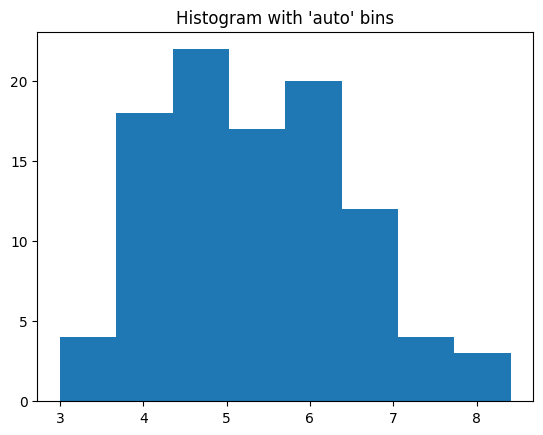

In [4]:
print(expected_value, variance_value)
plt.hist(function_eval, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

## Choosing degree and norm for polynomial approach

In [5]:

RMSE_1 = []
RMSE_2 = []
RMSE_3 = []


new_sample = utils.draw_sample(1000)

def get_newton_poly_6d(f, deg, lp):
    mi_6d = mp.MultiIndexSet.from_degree(
    spatial_dimension=6,
    poly_degree=deg,
    lp_degree=lp,
    )
    grd = mp.Grid(mi_6d)
    lag_coeffs_2d = f(grd.unisolvent_nodes)
    lag_poly = mp.LagrangePolynomial(mi_6d, lag_coeffs_2d)
    return mp.LagrangeToNewton(lag_poly)()


def get_RMSE(f, interpolant, new_sample):
    sample_size = new_sample.shape[0]
    return np.sqrt(np.sum((f(new_sample) - interpolant(new_sample))**2) / sample_size)
#for L1
min_degree = 1
max_deg = 9
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, 1)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_1.append(RMSE)

# for L2
min_degree = 1
max_deg = 6
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, 2)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_2.append(RMSE)


# for L_inf
min_degree = 1
max_deg = 3
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, np.inf)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_3.append(RMSE)

print(RMSE_1)
print(RMSE_2)
print(RMSE_3)

[0.36952055633666514, 0.1089848033363259, 0.03559944552020392, 0.00950280736108204, 0.0022203123863928846, 0.000630983210572986, 0.00017897878324423804, 6.41031133390998e-05]
[0.36952055633666514, 0.10926476607371621, 0.020816911732346677, 0.008350917676448074, 0.0017051043863933987]
[0.29685487833874663, 0.04980394051111533]


C:\Users\macie\AppData\Local\Temp\ipykernel_12944\4181566706.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


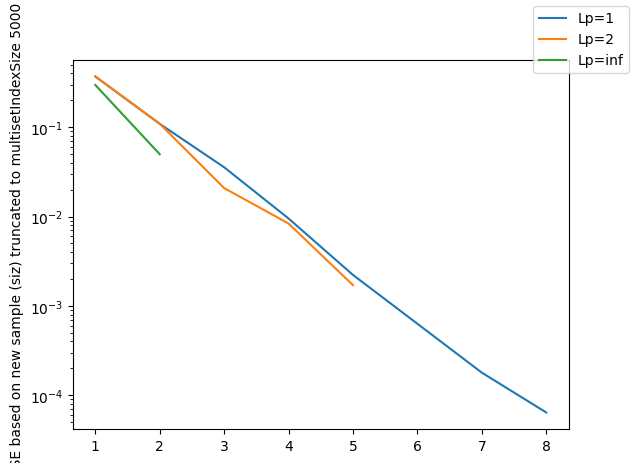

In [6]:
fig, ax = plt.subplots()
ax.plot(list(range(min_degree, 9)), RMSE_1, label = "Lp=1")
ax.plot(list(range(min_degree, 6)), RMSE_2, label = "Lp=2")
ax.plot(list(range(min_degree, 3)), RMSE_3, label = "Lp=inf")
ax.set_yscale('log')
ax.set_ylabel('RMSE based on new sample (siz) truncated to multisetIndexSize 5000')
fig.legend()
fig.show()

### We fixed L1 norm with deg = 9

### Sobol indices

In [12]:
newtonInterPolant = get_newton_poly_6d(otl_normalized, 9, 1)

mi_6d = mp.MultiIndexSet.from_degree(
    spatial_dimension=6,
    poly_degree=9,
    lp_degree=1)

grd = mp.Grid(mi_6d)
lag_coeffs_6d = otl_normalized(grd.unisolvent_nodes)
# Calculate legande Coefs
legandreCoefs = utilsLegandre.compute_legendre_coefficients(mi_6d.exponents, grd.unisolvent_nodes, lag_coeffs_6d)
# Caluclate sobol indices
sobol_indices = utilsLegandre.compute_sobol_indices(mi_6d.exponents, legandreCoefs)
partial = 1
sobol_indices_1 = utilsLegandre.compute_sobol_indices(mi_6d.exponents, legandreCoefs, order=partial)


[4.95662595e-01 4.07198048e-01 7.08400049e-02 1.86395270e-02
 3.38080308e-08 1.26498213e-05]
[5.00144437e-01 4.11679814e-01 7.40052638e-02 2.18027377e-02
 5.16546398e-08 1.49266696e-05]


Text(0.5, 1.0, 'Sobol indices plot partial')

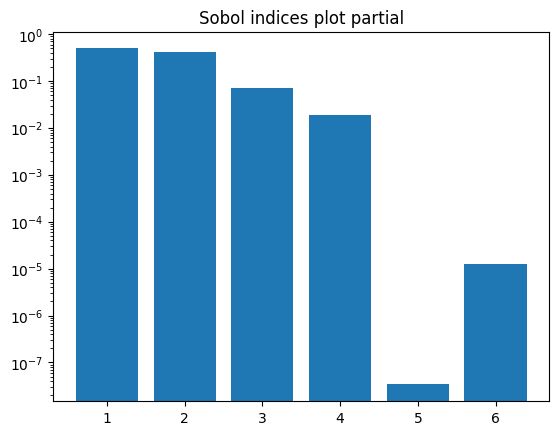

In [17]:
print(sobol_indices_1)
print(sobol_indices) #note values are different but genral trend is the same
plt.bar(list(range(1,6+1)), sobol_indices_1)
plt.yscale("log")
plt.title("Sobol indices plot partial")

Text(0.5, 1.0, 'Sobol indices plot')

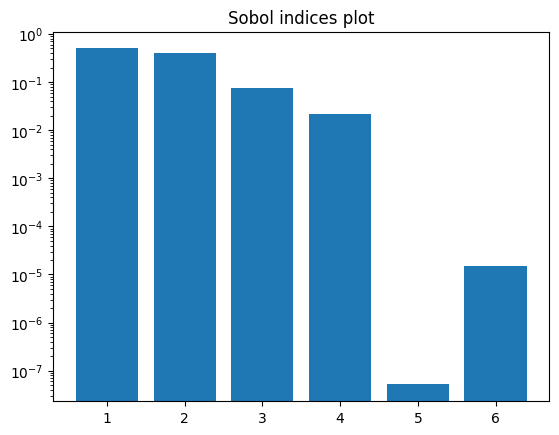

In [8]:
plt.bar(list(range(1,6+1)), sobol_indices)
plt.yscale("log")
plt.title("Sobol indices plot")

In [10]:
## Should be closte to values  estimated via monte Carlo
mean_from_legandre = legandreCoefs[0]
variance_from_legandre = np.sum(legandreCoefs[1:]**2)
print(mean_from_legandre, variance_from_legandre)


5.434057139435865 1.306906360334102


## Comparing with other method 
Now we will try to use linear regression with feature selection (Lasso/aLasso). We can check whether 5,6 predictors will be rejected by the model

In [ ]:
from sklearn.linear_model import LassoCV
